## Birds and Frog species identification through deep learning

In [43]:
%%capture
import warnings
warnings.filterwarnings('ignore')
import os
import pandas as pd
!pip install librosa
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

In [28]:
path='C:\\Users\\ualbertin\\Documents\\Springboard\\BirdFrogAudio\\Train'
os.chdir(path)

In [13]:
df = pd.read_csv('_tp.csv') #Load the true positives

In [20]:
df.head()

,recording_id,species_id,songtype_id,t_min,f_min,t_max,f_max
0,003bec244,14,1,44.5440,2531.250,45.1307,5531.25
1,006ab765f,23,1,39.9615,7235.160,46.0452,11283.40
2,007f87ba2,12,1,39.1360,562.500,42.2720,3281.25
3,0099c367b,17,4,51.4206,1464.260,55.1996,4565.04
4,009b760e6,10,1,50.0854,947.461,52.5293,10852.70


In [74]:
df[['species_id','songtype_id']].value_counts()

species_id  songtype_id
23          4              50
13          1              50
1           1              50
3           1              50
4           1              50
5           1              50
6           1              50
7           1              50
8           1              50
10          1              50
11          1              50
23          1              50
12          1              50
14          1              50
15          1              50
16          4              50
18          1              50
21          1              50
0           1              50
22          1              44
19          1              43
17          1              40
20          1              40
2           1              37
9           1              34
17          4              28
dtype: int64

In [101]:
filename=df.recording_id[1]+str('.flac')
tstart = df.t_min[1]
tend = df.t_max[1]
tstart, tend

(39.9615, 46.0452)

In [127]:
y, sr = librosa.load(filename,sr=None)

In [128]:
y.shape

(2880000,)

In [129]:
sr #in Hz? - can down sample?

48000

In [130]:
round(tstart*sr).astype(int),round(tend*sr).astype(int)

(1918152, 2210170)

In [131]:
y_cut=y[round(tstart*sr).astype(int):round(tend*sr).astype(int)]

In [132]:
tempo, beat_frames = librosa.beat.beat_track(y=y_cut, sr=sr)
tempo

119.68085106382979

In [133]:
beat_frames

array([  5,  50,  92, 142, 183, 229, 271, 314, 357, 398, 441, 482])

In [134]:
beat_times = librosa.frames_to_time(beat_frames, sr=sr)
beat_times

array([0.05333333, 0.53333333, 0.98133333, 1.51466667, 1.952     ,
       2.44266667, 2.89066667, 3.34933333, 3.808     , 4.24533333,
       4.704     , 5.14133333])

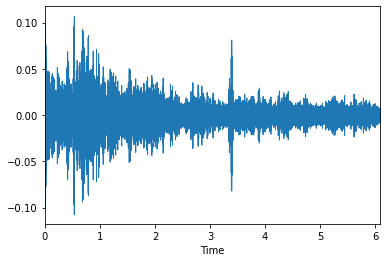

In [135]:
librosa.display.waveplot(y_cut,sr=sr, x_axis='time', offset=0.0)

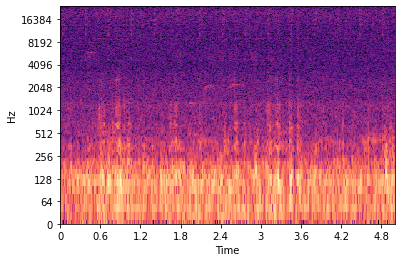

In [136]:
#compute the spectrogram magnitude and phase
S_full, phase = librosa.magphase(librosa.stft(y))
idx = slice(*librosa.time_to_frames([30, 35], sr=sr))
librosa.display.specshow(librosa.amplitude_to_db(S_full[:, idx], ref=np.max),
                         y_axis='log', x_axis='time', sr=sr)

In [137]:
%%capture
import IPython.display as ipd
from IPython.core.display import HTML
ipd.Audio(y_cut, rate=sr) # load a NumPy array
wavfile.write('filename.wav', sr, y_cut)
wavPlayer("filename.wav")

In [138]:
y_cut.shape

(292018,)

In [139]:
from IPython.display import Audio
Audio('filename.wav')